In [1]:
#import torch
#import torch.nn as nn
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [13]:
import os

# Disable Intel MKL warning
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [2]:
G1 = 0.0
F2 = 0.0
F1 = np.linspace(0.001,0.01,10)
G2 = np.linspace(0.001,0.01,10)

In [3]:
G1 = 0.0
F2 = 0.0
F1 = np.linspace(0.001,0.01,10)
G2 = np.linspace(0.001,0.01,10)
input_gamma1 = np.linspace(0.0,0.02,21)
measured_gamma1 = np.zeros((len(input_gamma1),len(F1),len(G2)),dtype=np.float64)
gamma1_bias = np.zeros_like(measured_gamma1)
additive_bias = np.zeros((len(F1),len(G2)),dtype=np.float64)
multiplicative_bias = np.zeros((len(F1),len(G2)),dtype=np.float64)
for i in range(len(input_gamma1)):
    measured_gamma1[i][:][:] = fits.getdata(f'data/Fix_F1G2/gamma1_measured_flexion_F1G2_{input_gamma1[i]:.3f}.fits')
    gamma1_bias[i][:][:] = measured_gamma1[i][:][:] - input_gamma1[i]

### use linear fit to get additive bias
for i in range(len(F1)):
    for j in range(len(G2)):
        model = np.poly1d(np.polyfit(input_gamma1, gamma1_bias[:,i,j], 1))
        additive_bias[i,j] = model[0]
        multiplicative_bias[i,j] = model[1]

In [5]:
bias = gamma1_bias[5] ## could be anything 
print(bias)

[[1.23175959e-06 1.23401672e-06 1.23777617e-06 1.24304286e-06
  1.24981714e-06 1.25809424e-06 1.26787789e-06 1.27916737e-06
  1.29196301e-06 1.30626482e-06]
 [4.10309867e-06 4.10535987e-06 4.10912292e-06 4.11439419e-06
  4.12116959e-06 4.12945452e-06 4.13924643e-06 4.15054560e-06
  4.16335119e-06 4.17766174e-06]
 [8.88879467e-06 8.89105441e-06 8.89482264e-06 8.90010044e-06
  8.90689035e-06 8.91518620e-06 8.92498967e-06 8.93630792e-06
  8.94912884e-06 8.96346701e-06]
 [1.55890448e-05 1.55913134e-05 1.55950861e-05 1.56003749e-05
  1.56071776e-05 1.56154876e-05 1.56253153e-05 1.56366515e-05
  1.56495014e-05 1.56638593e-05]
 [2.42041090e-05 2.42063832e-05 2.42101684e-05 2.42154701e-05
  2.42222887e-05 2.42306209e-05 2.42404655e-05 2.42518300e-05
  2.42647094e-05 2.42791072e-05]
 [3.47343424e-05 3.47366238e-05 3.47404211e-05 3.47457358e-05
  3.47525713e-05 3.47609311e-05 3.47708101e-05 3.47822079e-05
  3.47951250e-05 3.48095635e-05]
 [4.71801838e-05 4.71824678e-05 4.71862747e-05 4.71916127e

In [33]:
f1,g2 = np.meshgrid(F1,G2)
def func_F1G2(F1G2,a,b):
    F1,G2 = F1G2
    return a * F1 * G2 + b
def func_G2(F1G2,a,b):
    F1,G2 = F1G2
    return a * G2 + b
def func_G2_G22(F1G2,a,b,c):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + c

def func_G2_G22_F1_F11(F1G2,a,b,c,d,e,f):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + c*F1 + d*F1*F1 + e * G2* F1 + f
        
        
def func_G22_F11(F1G2,b,d,e,f):
    F1,G2 = F1G2
    return b*G2**2 + d*F1*F1 + e * G2* F1 + f


def func_G2_G22_x(F1G2,a,b,e,f):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + e * G2* F1 + f

def func_G2_G22_x(F1G2,a,b,e,f):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + e * G2* F1 + f



def func_G2_G22_F1_F11_no_cross(F1G2,a,b,c,d,f):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + c*F1 + d*F1*F1 + f

F1G2 = np.vstack([f1.ravel(), g2.ravel()])
Bias = bias.ravel()



In [34]:
popt, _ = curve_fit(func_G2, F1G2, Bias)
a,b = popt
Bias_fit = a * g2 + b 
print(r'square error for a * g2 + b  is: ' + str(np.sum((Bias_fit-bias)**2)))

popt, _ = curve_fit(func_G2_G22, F1G2, Bias)
a,b,c = popt
Bias_fit = a * g2 + b * g2* g2 + c
print(r'square error for aG2+bG2^2 + c is: ' + str(np.sum((Bias_fit-bias)**2)))

popt, _ = curve_fit(func_G2_G22_F1_F11, F1G2, Bias)

a,b,c,d,e,f = popt
Bias_fit = a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f
print(r'square error for a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f is: ' + str(np.sum((Bias_fit-bias)**2)))


popt, _ = curve_fit(func_G22_F11, F1G2, Bias)

b,d,e,f = popt
Bias_fit = b*G2**2 + d*F1*F1 + e * G2* F1 + f
print(r'square error for b*G2**2 + d*F1*F1 + e * G2* F1 + f is: ' + str(np.sum((Bias_fit-bias)**2)))


popt, _ = curve_fit(func_G2_G22_F1_F11_no_cross, F1G2, Bias)

a,b,c,d,f = popt
Bias_fit = a * g2 + b*g2**2 + c*f1 + d*f1*f1 + f
print(r'square error for a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f is: ' + str(np.sum((Bias_fit-bias)**2)))


square error for a * g2 + b  is: 4.8434025748836525e-09
square error for aG2+bG2^2 + c is: 6.092904415023036e-14
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
square error for a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f is: 1.5834794501125118e-16
square error for b*G2**2 + d*F1*F1 + e * G2* F1 + f is: 1.926861480353306e-07
square error for a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f is: 1.626582755921768e-16
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprec

In [26]:
print(a)
print(d)

-3.987069182585018e-06
0.0007606285551363349


In [23]:
np.sum(bias)**2

1.380835593502061e-05

Fits with $a\times G2 + b$ and $a \times F1\times G2 + b$ does not provide good fits to $\gamma_1 - \gamma_{1,mea}$
I reached pretty small sum square value with $a*G2 + b*G2^2 + c$. You need all terms in second order to reach the minimum of sum square error...

If we are just looking for the additive bias, I think $a * G2 + b * G2^2 + e * G2 F1 + f$ is already a good fit (almost exhaust the minimization). 
For the multiplicative bias, you also need all the terms to get a good fit. 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


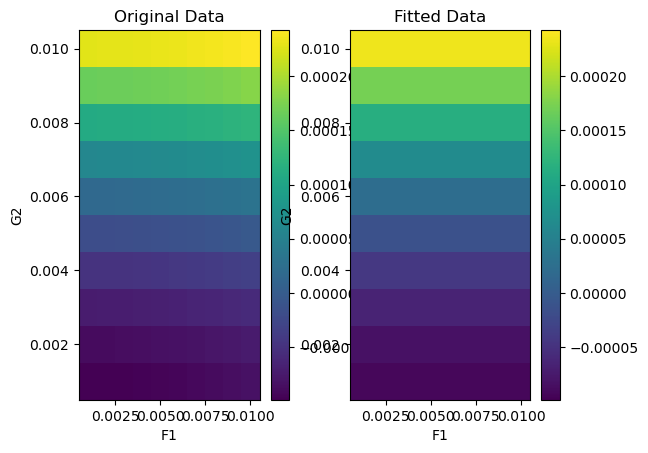

2.385886445577878e-09


In [133]:
popt, _ = curve_fit(func_G2_G22, F1G2, Bias)
a,b,c = popt
Bias_fit = a * g2 + b * g2* g2 + c

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


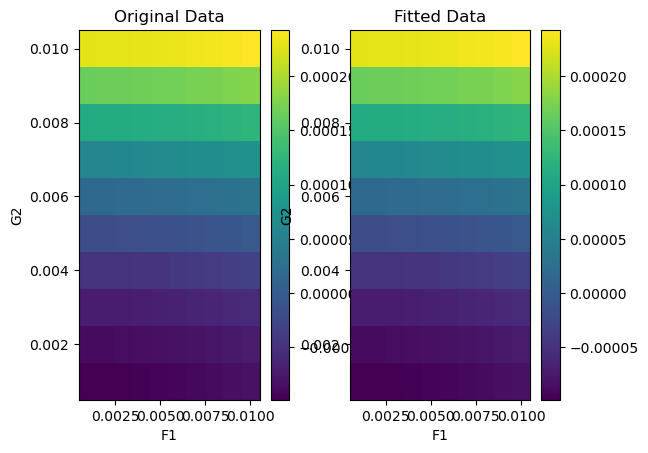

4.4607562788973124e-13


In [134]:
popt, _ = curve_fit(func_G2_G22, F1G2, Bias)
a,b,c = popt
Bias_fit = + b*g2**2  + d*f1*f1 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


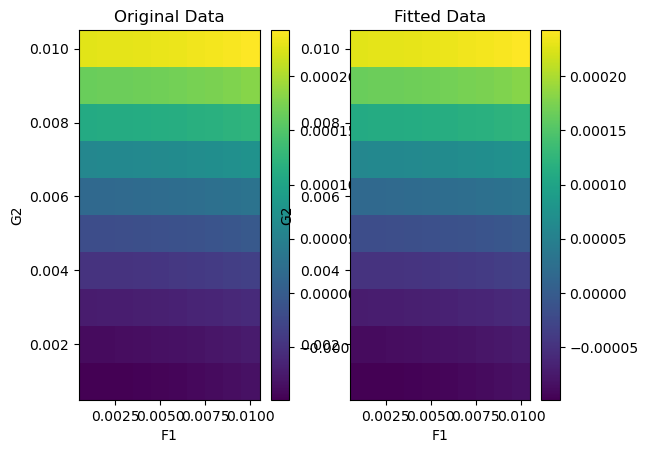

2.7865353537068406e-15


In [135]:
popt, _ = curve_fit(func_G2_G22_F1_F11, F1G2, Bias)

a,b,c,d,e,f = popt
Bias_fit = a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


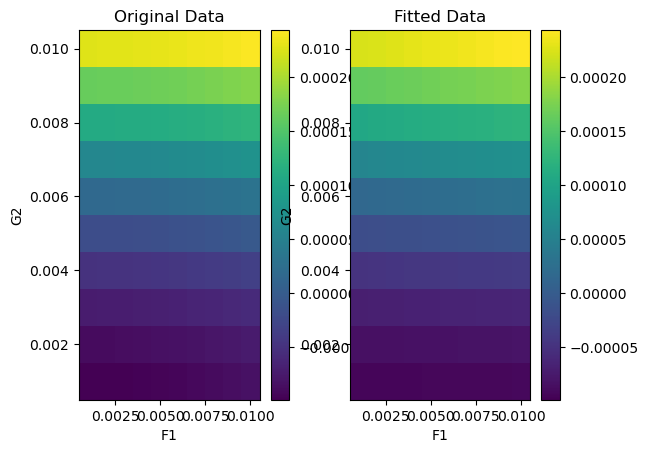

6.049161340835618e-10


In [129]:
popt, _ = curve_fit(func_G2_G22_x, F1G2, Bias)
a,b,e,f = popt
Bias_fit = a * g2 + b*g2**2 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


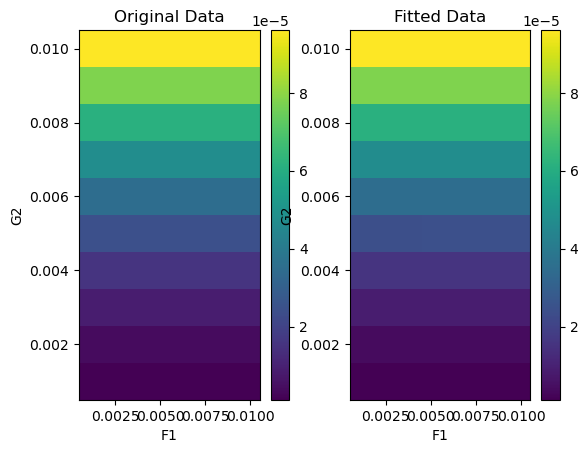

6.868254226920188e-14


In [17]:
popt, _ = curve_fit(func_G22_F11, F1G2, Bias)

b,d,e,f = popt
Bias_fit = a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))